 import libraries

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 import all weather datas

In [90]:
df = pd.read_csv('VN_weather_2011_2023_clean.csv', index_col=0)
df_monthly = pd.read_csv('VN_weather_112011_3312023_monthly_clean.csv', index_col=0)
df_hcm = pd.read_csv('VN_HCM_2020.csv', index_col=0)
df_yearly_pm25_population = pd.read_csv('VN_yearly_pm25_population.csv', index_col=0)     

In [91]:
def chart_of_pm25(by='Temperature', df=df, use='min'):
    sns.set_palette("Spectral_r")
    col_name = ['date', 'pm25', f'{by}_mean', f'{by}_min', f'{by}_max']
    df_data = df.loc[:, col_name]

    df_data['label'] = pd.qcut(df_data[f'{by}_{use}'], q=5, precision=0, duplicates='drop')

    fig, ax = plt.subplots(figsize=(10,5))
    series_count = df_data.sort_values(by='label').groupby('label').size()
    series_pct = series_count.apply(lambda x: round(x*100/len(df_data), 2))
    series_pm25 = df_data.sort_values(by='label').groupby('label').agg({'pm25': 'mean'})
    x = [str(i).replace(']', ')') for i in series_count.index]
    sns.set_style(style='darkgrid', rc={'axes.labelcolor': 'white', 'axes.facecolor': 'black', 'figure.facecolor': 'black', 'xtick.color': 'white', 'ytick.color': 'white'})
    ax = sns.barplot(x=x, y=series_pct.values, label = 'Frequency (%)')
    bx = ax.twinx()
    bx = sns.pointplot(x=x, y=series_pm25.pm25, color='red', label= 'PM 2.5 (µg/m3)')
    ax.grid(False)
    bx.grid(False)
    ax.set_xlabel(None)
    ax.set_ylabel('Frequency (%)')
    bx.set_ylabel('PM 2.5 (µg/m3)')
    ax.legend(loc='upper left', bbox_to_anchor=(1.08,0.8), labelcolor='w', facecolor='grey')
    bx.legend(loc='upper left', bbox_to_anchor=(1.08,0.7), labelcolor='w', facecolor='grey')
    plt.suptitle(f'Correlations between mean value of PM 2.5 and frequency of {by} intervals for each interval', weight="bold", size=16, fontdict={'color': 'white'})
    plt.show()


def chart_overview(by='Temperature', df=df):
    x = pd.to_datetime(df['Date']).dt.strftime('%m')
    plt.figure(figsize=(10, 5))
    sns.set_style(rc={'axes.labelcolor': 'white', 'axes.facecolor': 'black', 'figure.facecolor': 'black', 'xtick.color': 'white', 'ytick.color': 'white'})
    ax = sns.lineplot(df, x=x, y=by, hue='Area', legend=1)
    ax.grid(False)
    plt.legend(labelcolor='w', loc='upper left', bbox_to_anchor=(1,1), ncol=4)
    plt.xlabel('Month')
    plt.ylabel(by)
    plt.title(f'{by} of 60 areas in Vietnam from 2011 to 2023', fontdict={'color': 'white'})
    plt.show()

## Temperature overview of Vietnam from 01/2011-03/2023

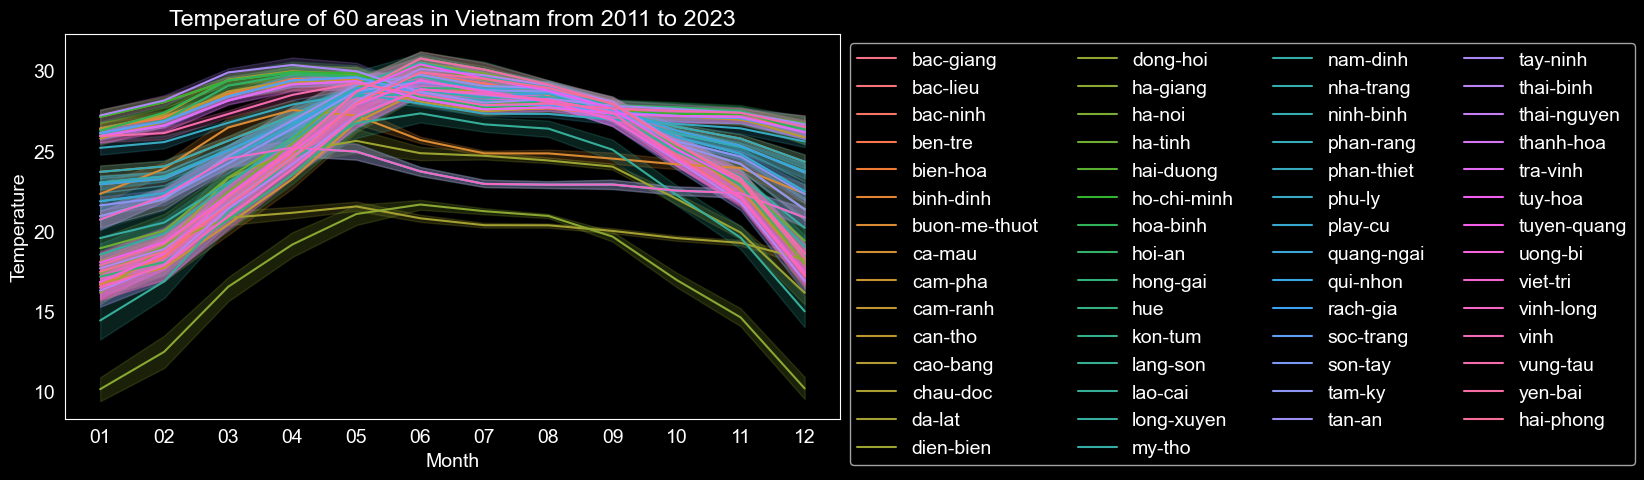

In [92]:
chart_overview(by='Temperature', df=df_monthly)

The chart shows the temperature of 60 provinces in Vietnam from 2011 to 2023, the highest temperature ranges from May to August. The lowest in the first 2 months of the year and the last 2 months of the year.

## Correlations between PM 2.5 and Temperature of Ho chi minh city

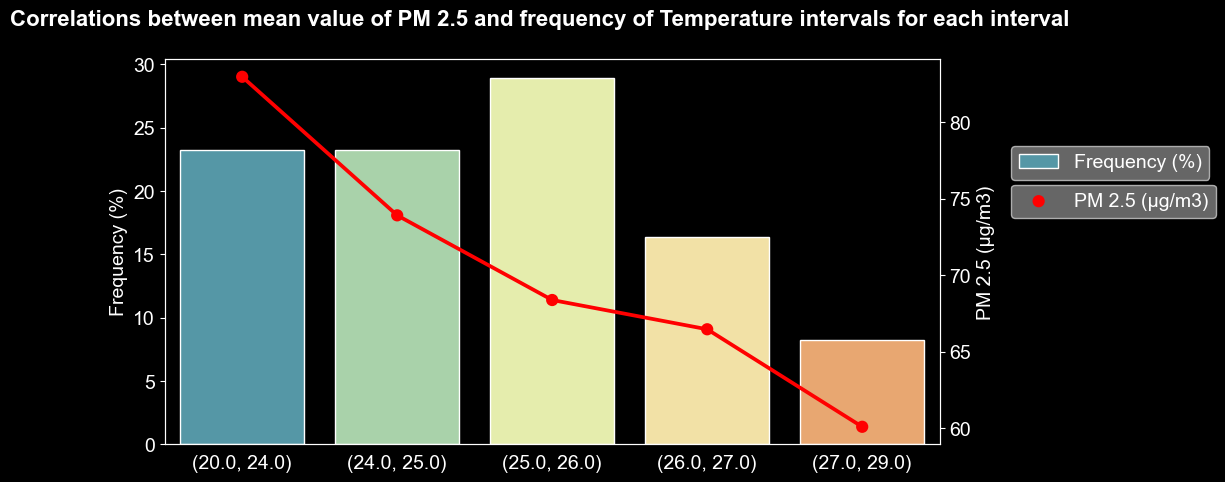

In [93]:
chart_of_pm25(by='Temperature', df=df_hcm)

According to the chart, average annual PM2.5 concentrations are lowest in the temperature range (27-29°C) with the lowest frequency of occurrence, followed by the temperature range (26-27°C). Finally, PM2.5 concentrations are highest in the temperature range (20-24°C). Corresponding to the "Temperature overview" chart, PM2.5 concentrations will decrease from May to August 
(Note: only one weather factor is considered with PM2.5)

## Pressure overview of Vietnam from 01/2011-03/2023

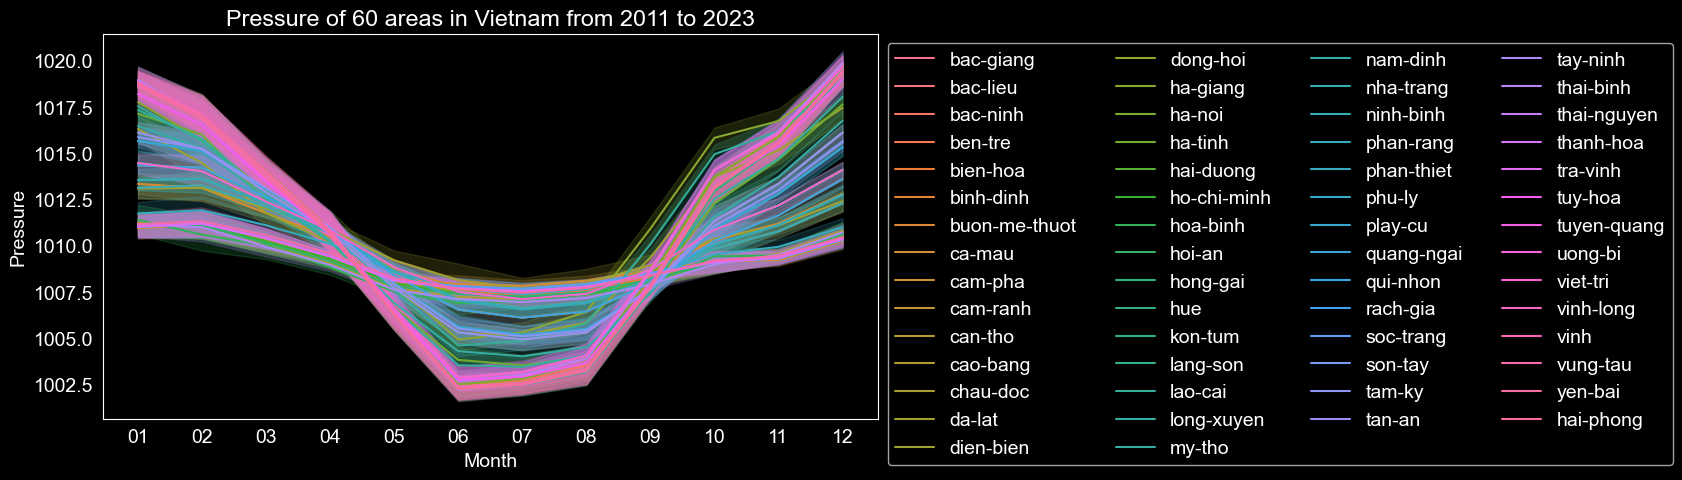

In [94]:
chart_overview(by='Pressure', df=df_monthly)

Pressure of the 60 provinces ranges from (1002 – 1020), the lowest atmospheric pressure from May to August every year. The highest in the first 2 months of the year and the last 2 months of the year.

## Correlations between PM 2.5 and Pressure of Ho Chi Minh city

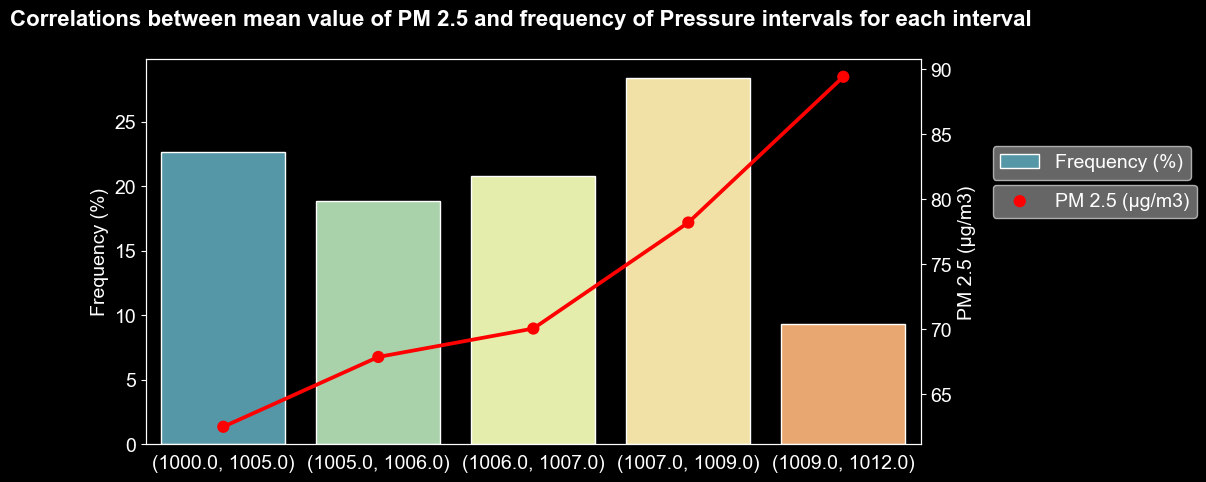

In [95]:
chart_of_pm25(by='Pressure', df=df_hcm)

Pressure in Ho Chi Minh City ranges from 1000 mb – 1012 mb in most years. PM2.5 concentrations are highest at atmospheric pressure range (1009 – 1012) with the lowest frequency and gradually decreasing to (1000 – 1005).
(Note: only one weather factor is considered with PM2.5)

## Rain overview of Vietnam from 01/2011-03/2023

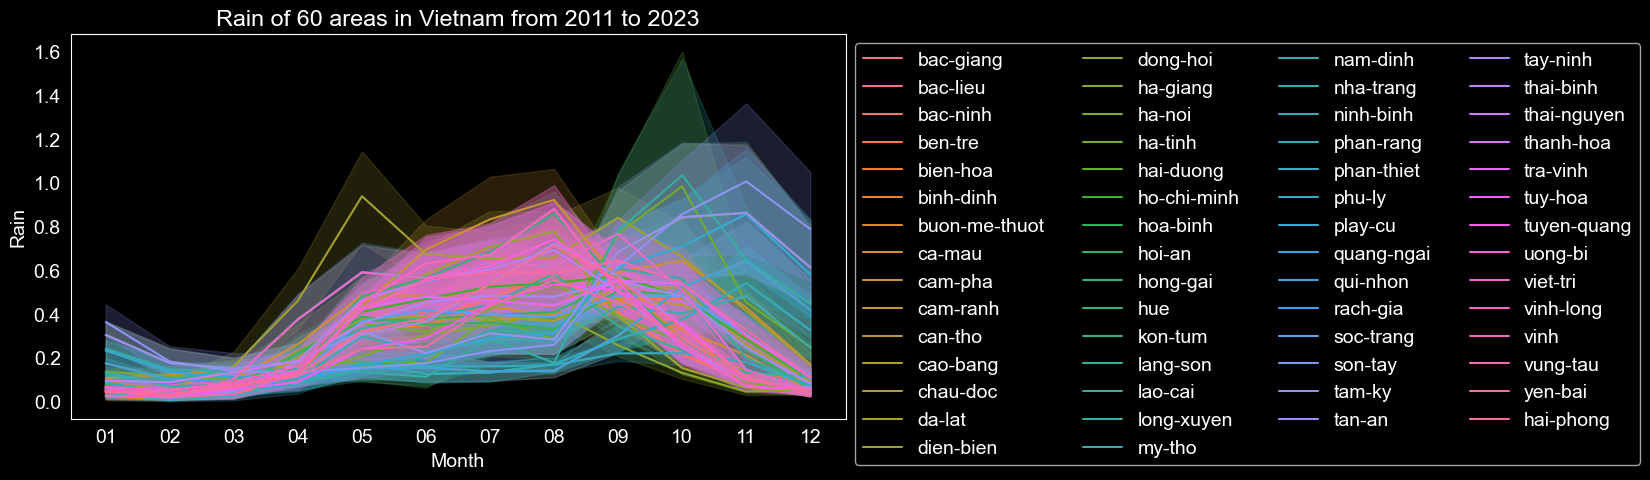

In [96]:
chart_overview(by='Rain', df=df_monthly)

The country's rainfall is highest from August to November every year, Lowest rainfall from February to March

## Correlations between PM 2.5 and Rain of Ho Chi Minh city

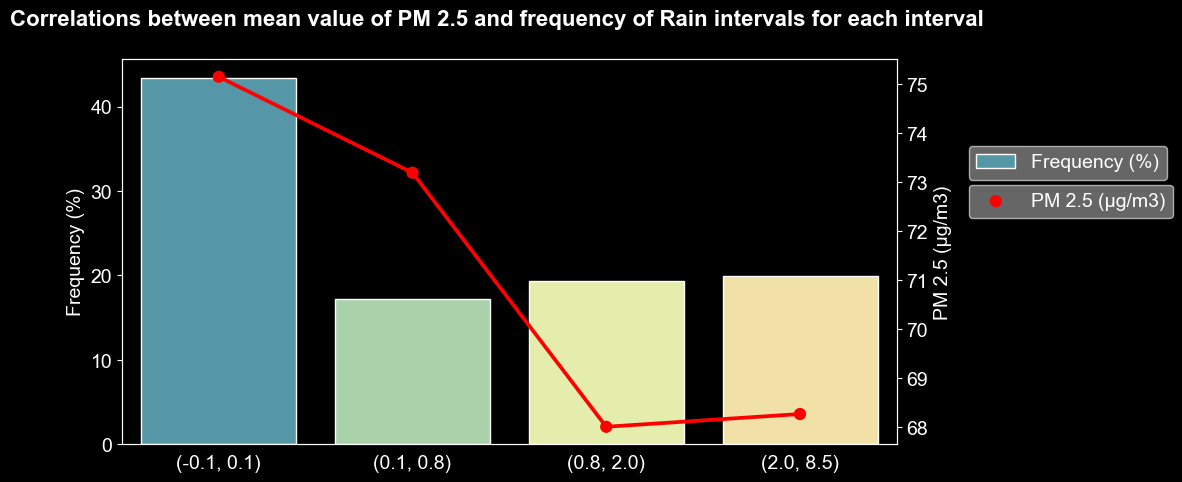

In [97]:
chart_of_pm25(by='Rain', df=df_hcm, use='max')

The lower the rainfall, the higher the PM2.5 concentration, but the frequency of rainfall (-0.1.01) accounts for the majority in Ho Chi Minh City.And the higher the precipitation, the lower the PM2.5 concentration.
(Note: only one weather factor is considered with PM2.5)

## Cloud overview of Vietnam from 01/2011-03/2023

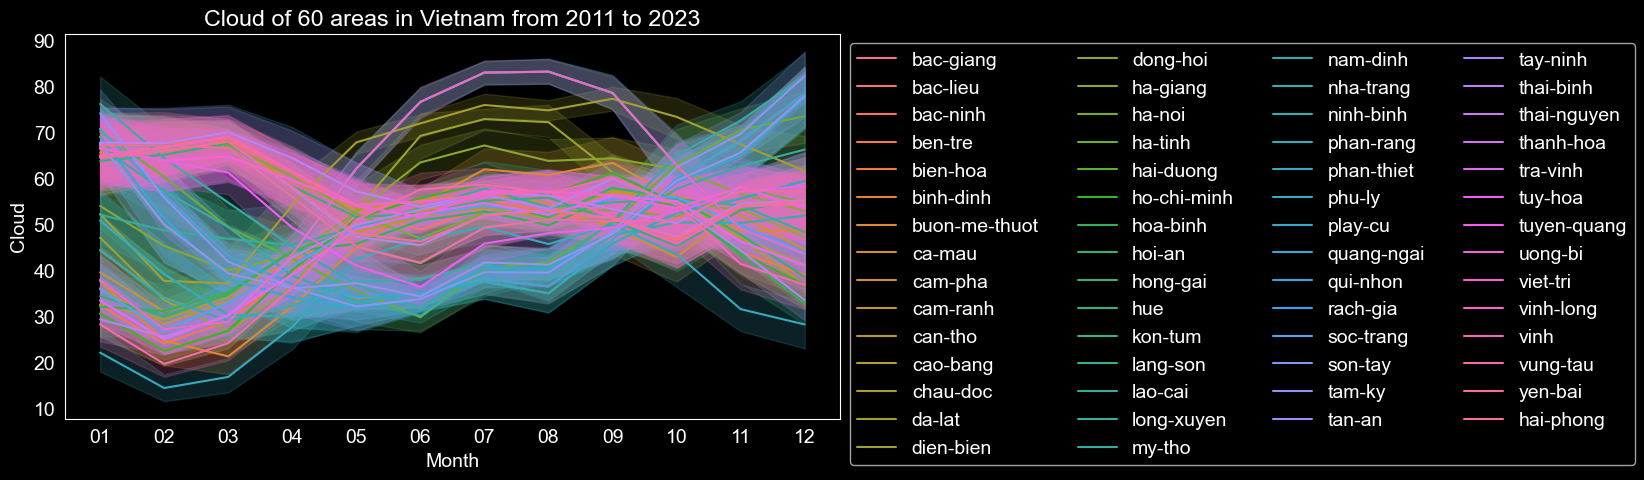

In [98]:
chart_overview(by='Cloud', df=df_monthly)

The percentage of clouds in the sky fluctuates drastically around (40-60) annually

## Correlations between PM 2.5 and Cloud of Ho Chi Minh city

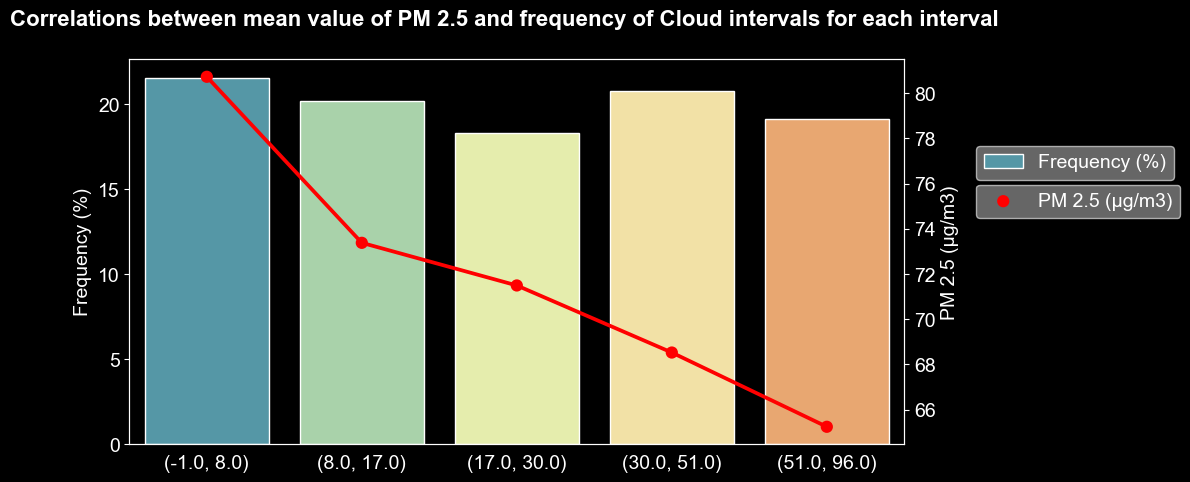

In [99]:
chart_of_pm25(by='Cloud', df=df_hcm)

The ratio of clouds is divided into 5 intervals (-1.8) (8.17) (17.30) (30.51) (51.96). The higher the percentage of clouds, the lower the PM2.5 concentration.
(Note: only one weather factor is considered with PM2.5)

## Wind overview of Vietnam from 01/2011-03/2023

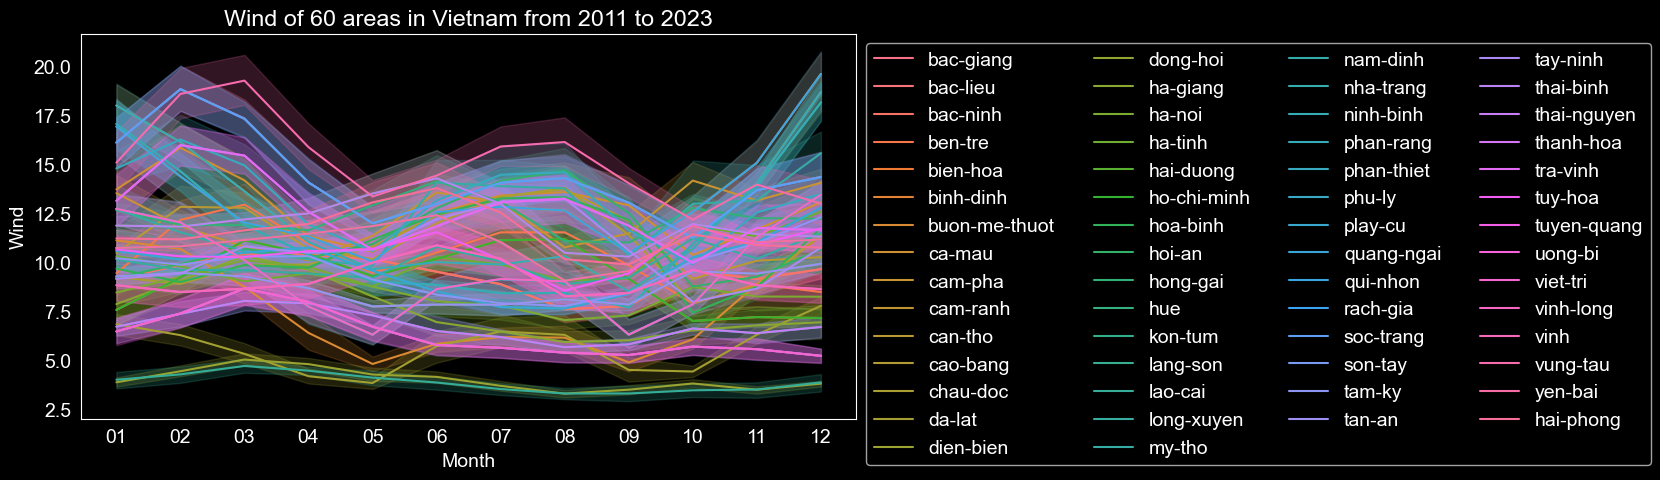

In [100]:
chart_overview(by='Wind', df=df_monthly)

Wind speed is concentrated in the range (7.5 – 15) annually of 60 provinces

## Correlations between PM 2.5 and Wind of Ho Chi Minh city

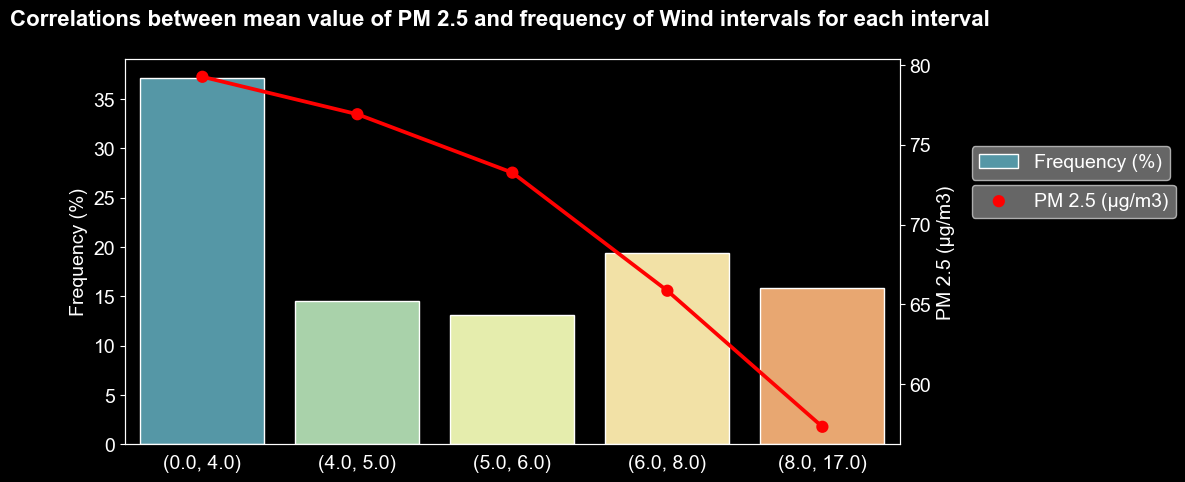

In [101]:
chart_of_pm25(by='Wind', df=df_hcm)

As an important meteorological factor, wind affects the horizontal and vertical transport of air pollutants. It also affects the rate of concentration and diffusion of direct pollutants. PM2.5 concentrations decrease significantly with increasing wind speed.
(Note: only one weather factor is considered with PM2.5)

## Correlations between PM 2.5 and Meteorological Factors in Ho Chi Minh city

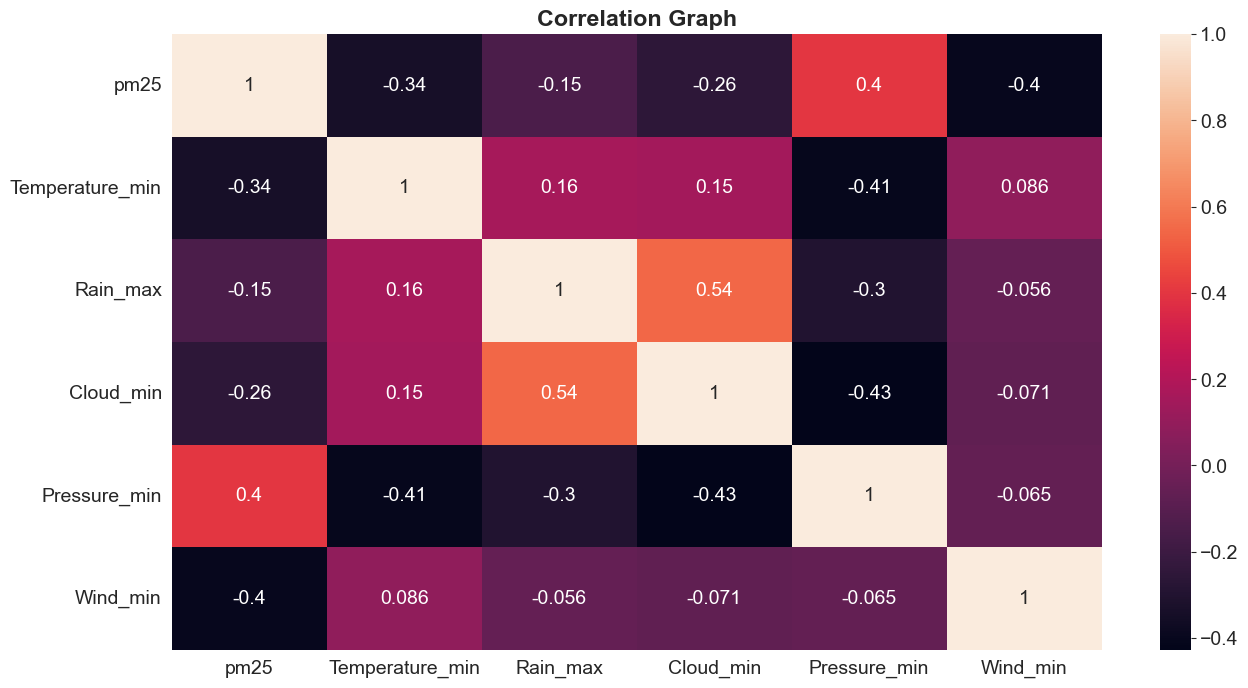

In [102]:
heatmap = df_hcm.loc[:, ['pm25','Temperature_min', 'Rain_max', 'Cloud_min', 'Pressure_min', 'Wind_min']]

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(15,8))
sns.heatmap(heatmap.corr(), annot=True)
plt.title("Correlation Graph", fontweight="bold")
plt.show()

After the rain is over, open the door for air cirulation. Use a dedicated mask, shouls buy an air purifier

# Solution

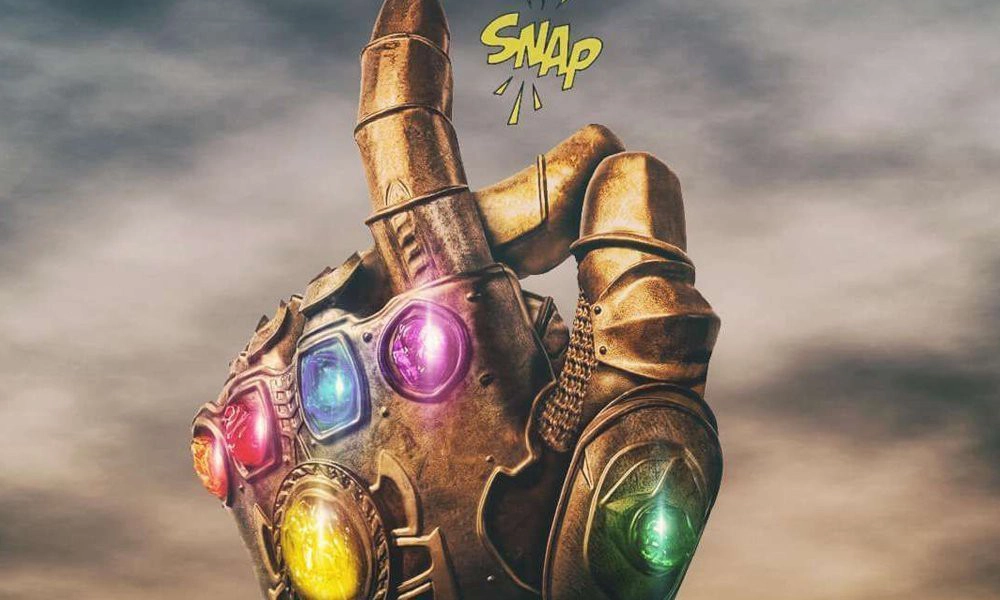